# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Muhammad Dava Pasha
- Email: davapasha16@gmail.com
- Id Dicoding: mdavap

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

import warnings
warnings.filterwarnings('ignore')

### Menyiapkan data yang akan diguankan

## Data Understanding

In [2]:
data = pd.read_csv('./data.csv', sep=';')
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital_status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application_mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application_order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime_evening_attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous_qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous_qualification_grade,4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mothers_qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Fathers_qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [4]:
data.count()

Marital_status                                  4424
Application_mode                                4424
Application_order                               4424
Course                                          4424
Daytime_evening_attendance                      4424
Previous_qualification                          4424
Previous_qualification_grade                    4424
Nacionality                                     4424
Mothers_qualification                           4424
Fathers_qualification                           4424
Mothers_occupation                              4424
Fathers_occupation                              4424
Admission_grade                                 4424
Displaced                                       4424
Educational_special_needs                       4424
Debtor                                          4424
Tuition_fees_up_to_date                         4424
Gender                                          4424
Scholarship_holder                            

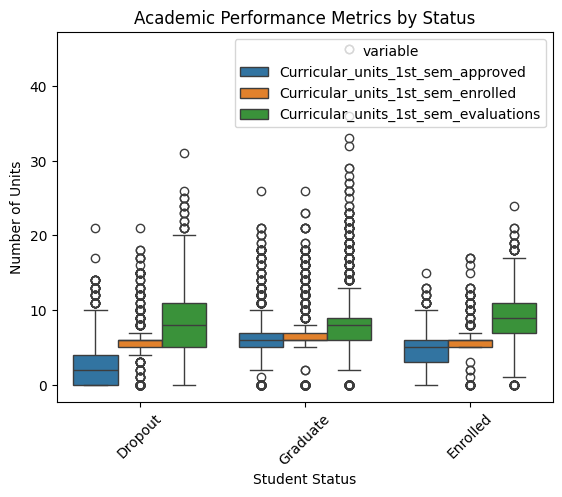

In [5]:
performance_metrics = ['Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_enrolled', 
                      'Curricular_units_1st_sem_evaluations']
df_melted = data.melt(id_vars=['Status'], value_vars=performance_metrics)
sns.boxplot(x='Status', y='value', hue='variable', data=df_melted)
plt.title('Academic Performance Metrics by Status')
plt.xticks(rotation=45)
plt.xlabel('Student Status')
plt.ylabel('Number of Units')
plt.show()

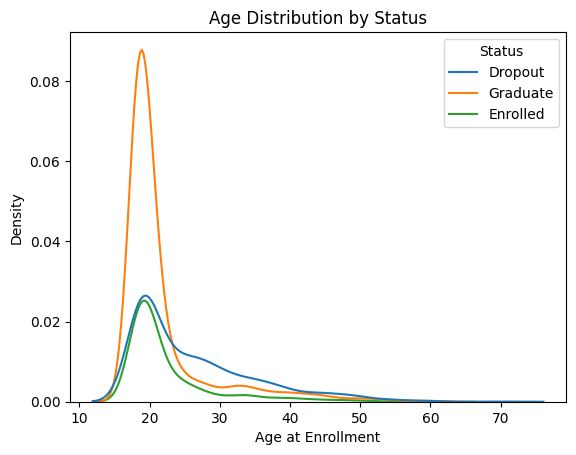

In [6]:
sns.kdeplot(data=data, x='Age_at_enrollment', hue='Status')
plt.title('Age Distribution by Status')
plt.xlabel('Age at Enrollment')
plt.ylabel('Density')
plt.show()

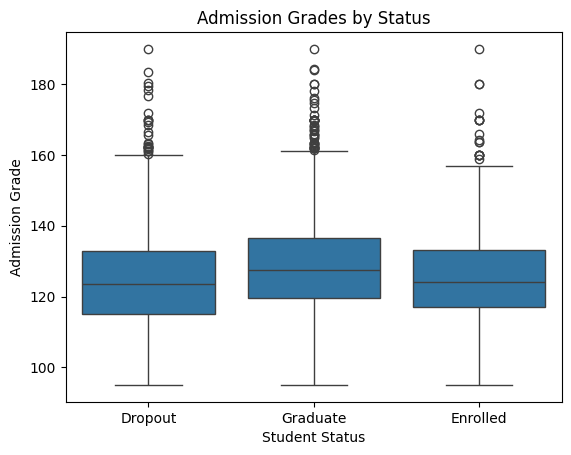

In [7]:
sns.boxplot(x='Status', y='Admission_grade', data=data)
plt.title('Admission Grades by Status')
plt.xlabel('Student Status')
plt.ylabel('Admission Grade')
plt.show()

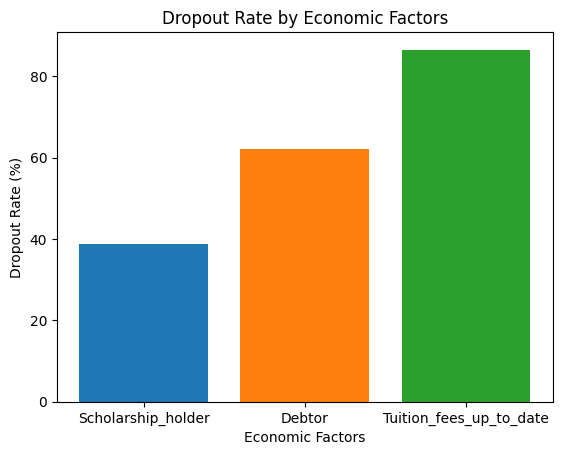

In [8]:
economic_colomns = ['Scholarship_holder', 'Debtor', 'Tuition_fees_up_to_date']
for var in economic_colomns:
    dropout_rate = data.groupby(var)['Status'].apply(lambda x: (x == 'Dropout').mean() * 100)
    plt.bar(var, dropout_rate)
plt.title('Dropout Rate by Economic Factors')
plt.xlabel('Economic Factors')
plt.ylabel('Dropout Rate (%)')
plt.show()

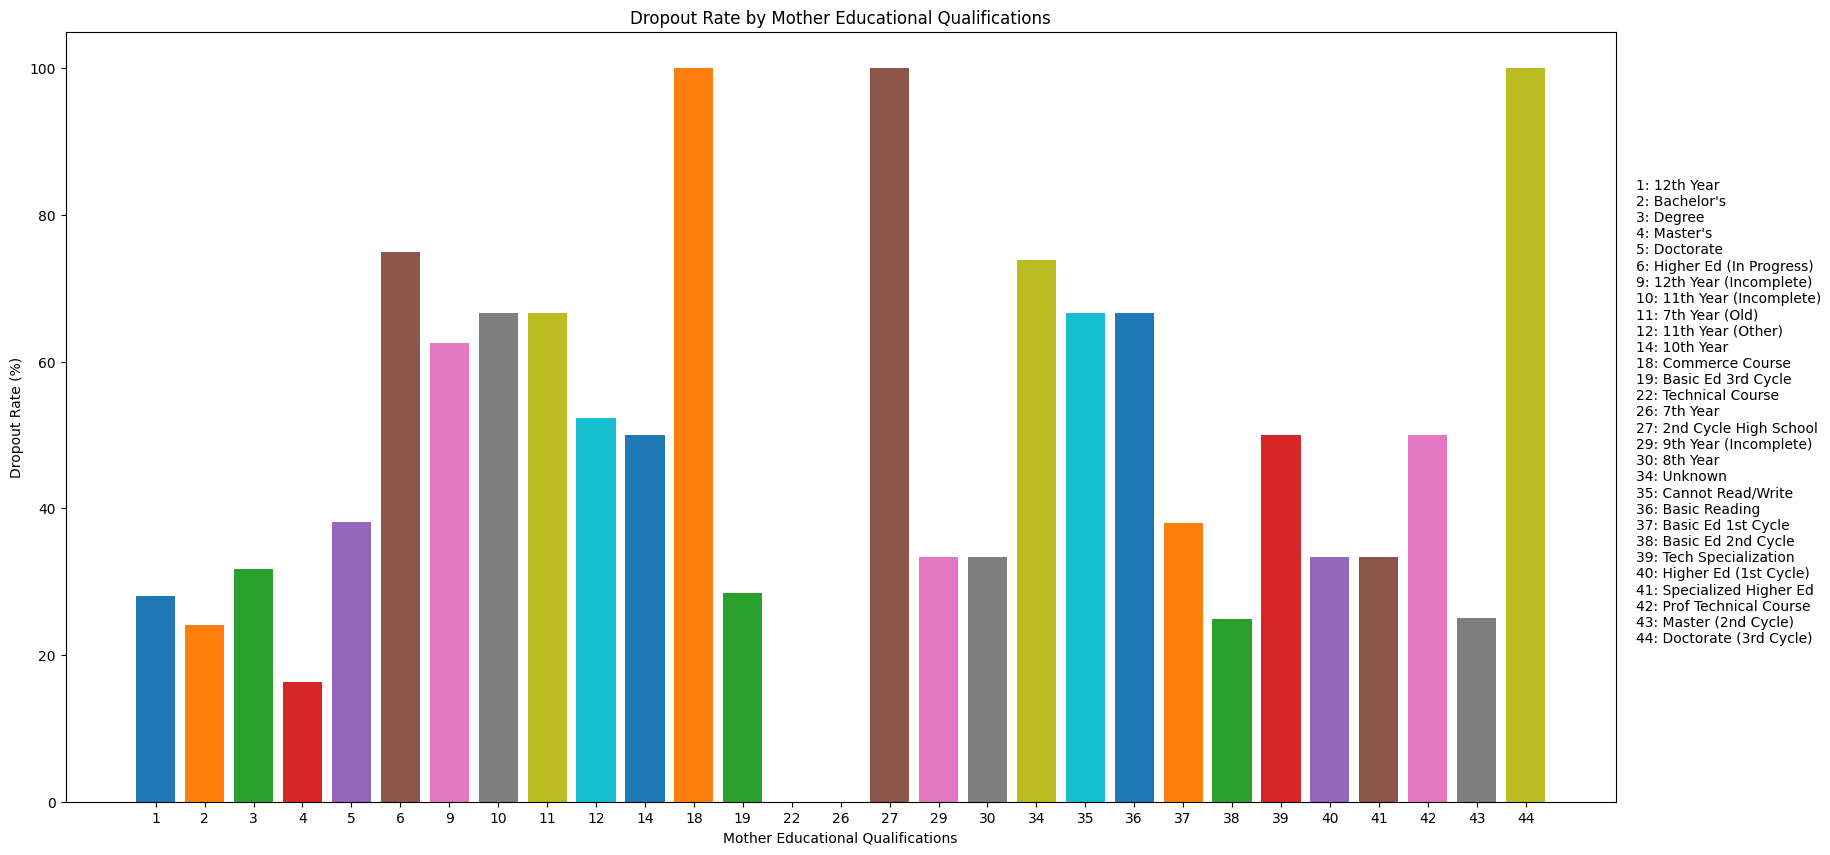

In [9]:
mother_education = {
    1: "12th Year",
    2: "Bachelor's",
    3: "Degree",
    4: "Master's",
    5: "Doctorate",
    6: "Higher Ed (In Progress)",
    9: "12th Year (Incomplete)",
    10: "11th Year (Incomplete)",
    11: "7th Year (Old)",
    12: "11th Year (Other)",
    14: "10th Year",
    18: "Commerce Course",
    19: "Basic Ed 3rd Cycle",
    22: "Technical Course",
    26: "7th Year",
    27: "2nd Cycle High School",
    29: "9th Year (Incomplete)",
    30: "8th Year",
    34: "Unknown",
    35: "Cannot Read/Write",
    36: "Basic Reading",
    37: "Basic Ed 1st Cycle",
    38: "Basic Ed 2nd Cycle",
    39: "Tech Specialization",
    40: "Higher Ed (1st Cycle)",
    41: "Specialized Higher Ed",
    42: "Prof Technical Course",
    43: "Master (2nd Cycle)",
    44: "Doctorate (3rd Cycle)"
}

plt.figure(figsize=(20, 10))
for key in mother_education:
    dropout_rate = data[data['Mothers_qualification'] == key]['Status'].apply(lambda x: x == 'Dropout').mean() * 100
    plt.bar(str(key), dropout_rate)
plt.title('Dropout Rate by Mother Educational Qualifications')
plt.xlabel('Mother Educational Qualifications')
plt.ylabel('Dropout Rate (%)')

legend_labels = [f"{code}: {label}" for code, label in mother_education.items()]
plt.figtext(0.91, 0.5, '\n'.join(legend_labels), fontsize=10, va='center')

plt.show()


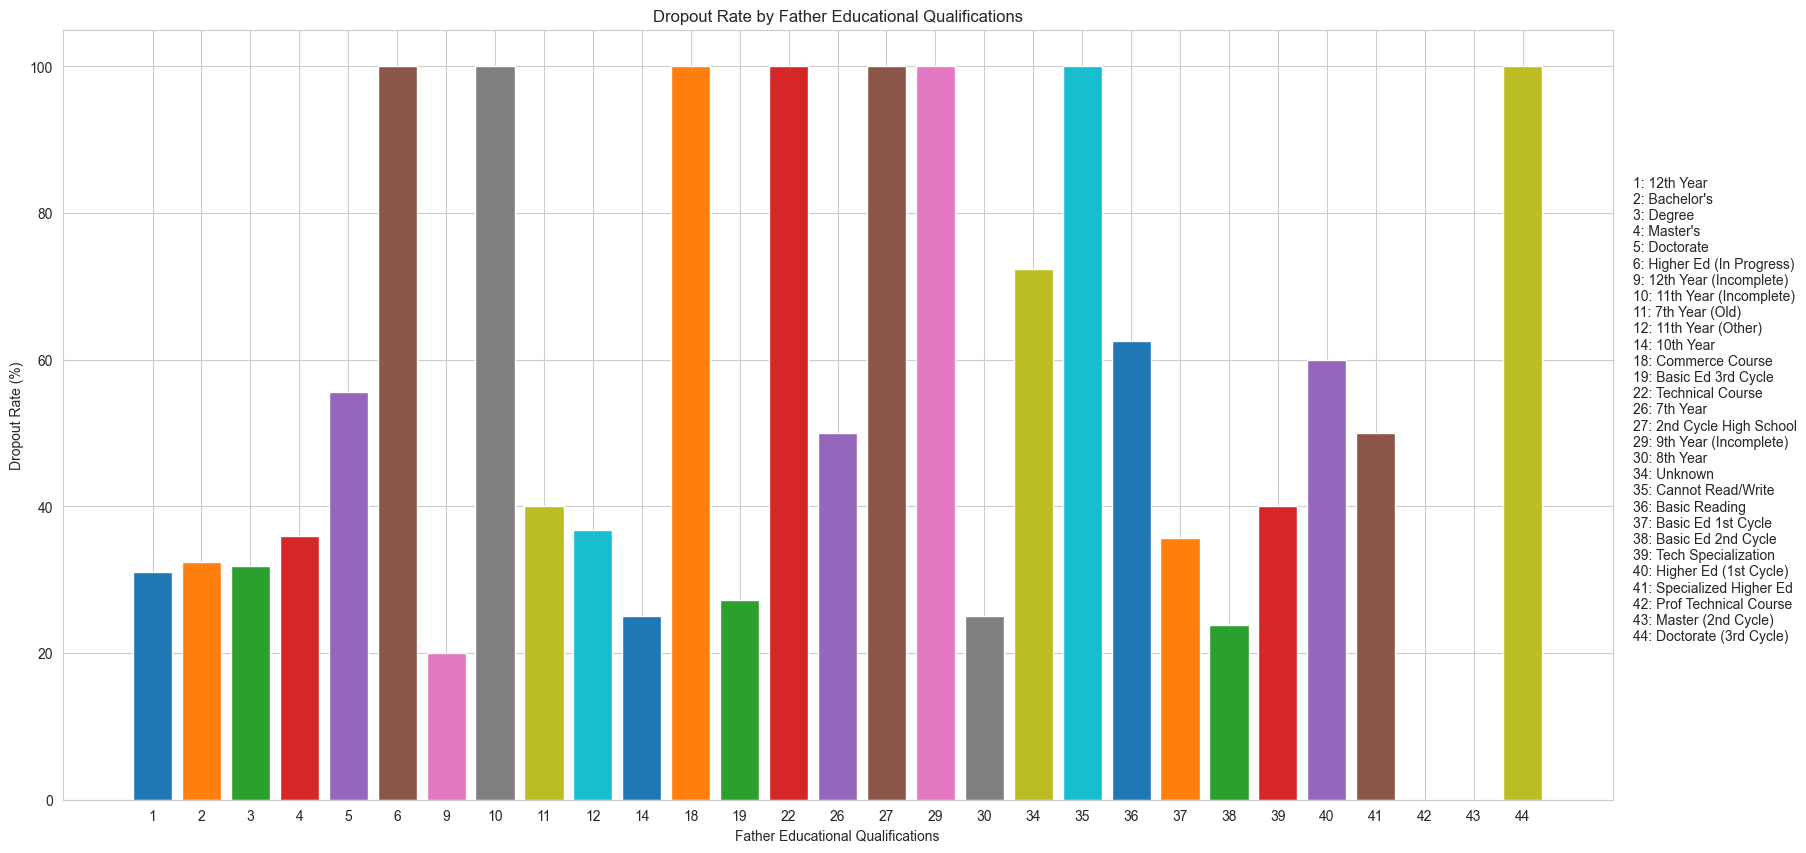

In [44]:
plt.figure(figsize=(20, 10))
for key in mother_education:
    dropout_rate = data[data['Fathers_qualification'] == key]['Status'].apply(lambda x: x == 'Dropout').mean() * 100
    plt.bar(str(key), dropout_rate)
plt.title('Dropout Rate by Father Educational Qualifications')
plt.xlabel('Father Educational Qualifications')
plt.ylabel('Dropout Rate (%)')

legend_labels = [f"{code}: {label}" for code, label in mother_education.items()]
plt.figtext(0.91, 0.5, '\n'.join(legend_labels), fontsize=10, va='center')

plt.show()

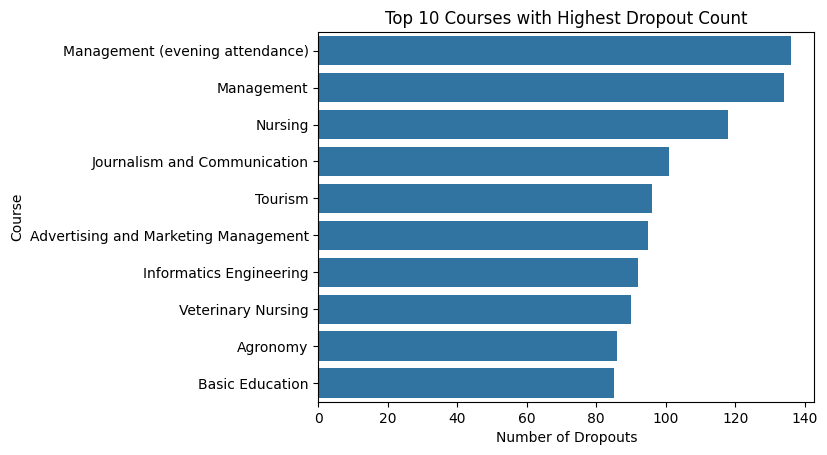

In [10]:
course = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}

course_dropout = data[data['Status'] == 'Dropout'].groupby('Course').size().sort_values(ascending=False)
top_10 = course_dropout[:10]
sns.barplot(x=top_10.values, y=[course[code] for code in top_10.index])
plt.title('Top 10 Courses with Highest Dropout Count')
plt.xlabel('Number of Dropouts')
plt.ylabel('Course')
plt.show()

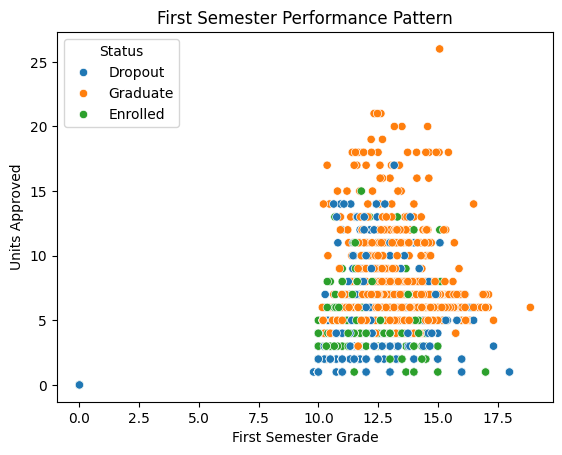

In [11]:
sns.scatterplot(data=data, x='Curricular_units_1st_sem_grade', 
                y='Curricular_units_1st_sem_approved', hue='Status')
plt.title('First Semester Performance Pattern')
plt.xlabel('First Semester Grade')
plt.ylabel('Units Approved')
plt.show()

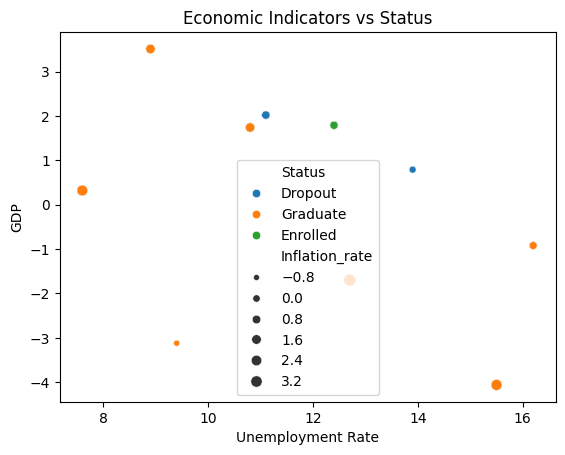

In [12]:
sns.scatterplot(data=data, x='Unemployment_rate', y='GDP', hue='Status', size='Inflation_rate')
plt.title('Economic Indicators vs Status')
plt.xlabel('Unemployment Rate')
plt.ylabel('GDP')
plt.show()

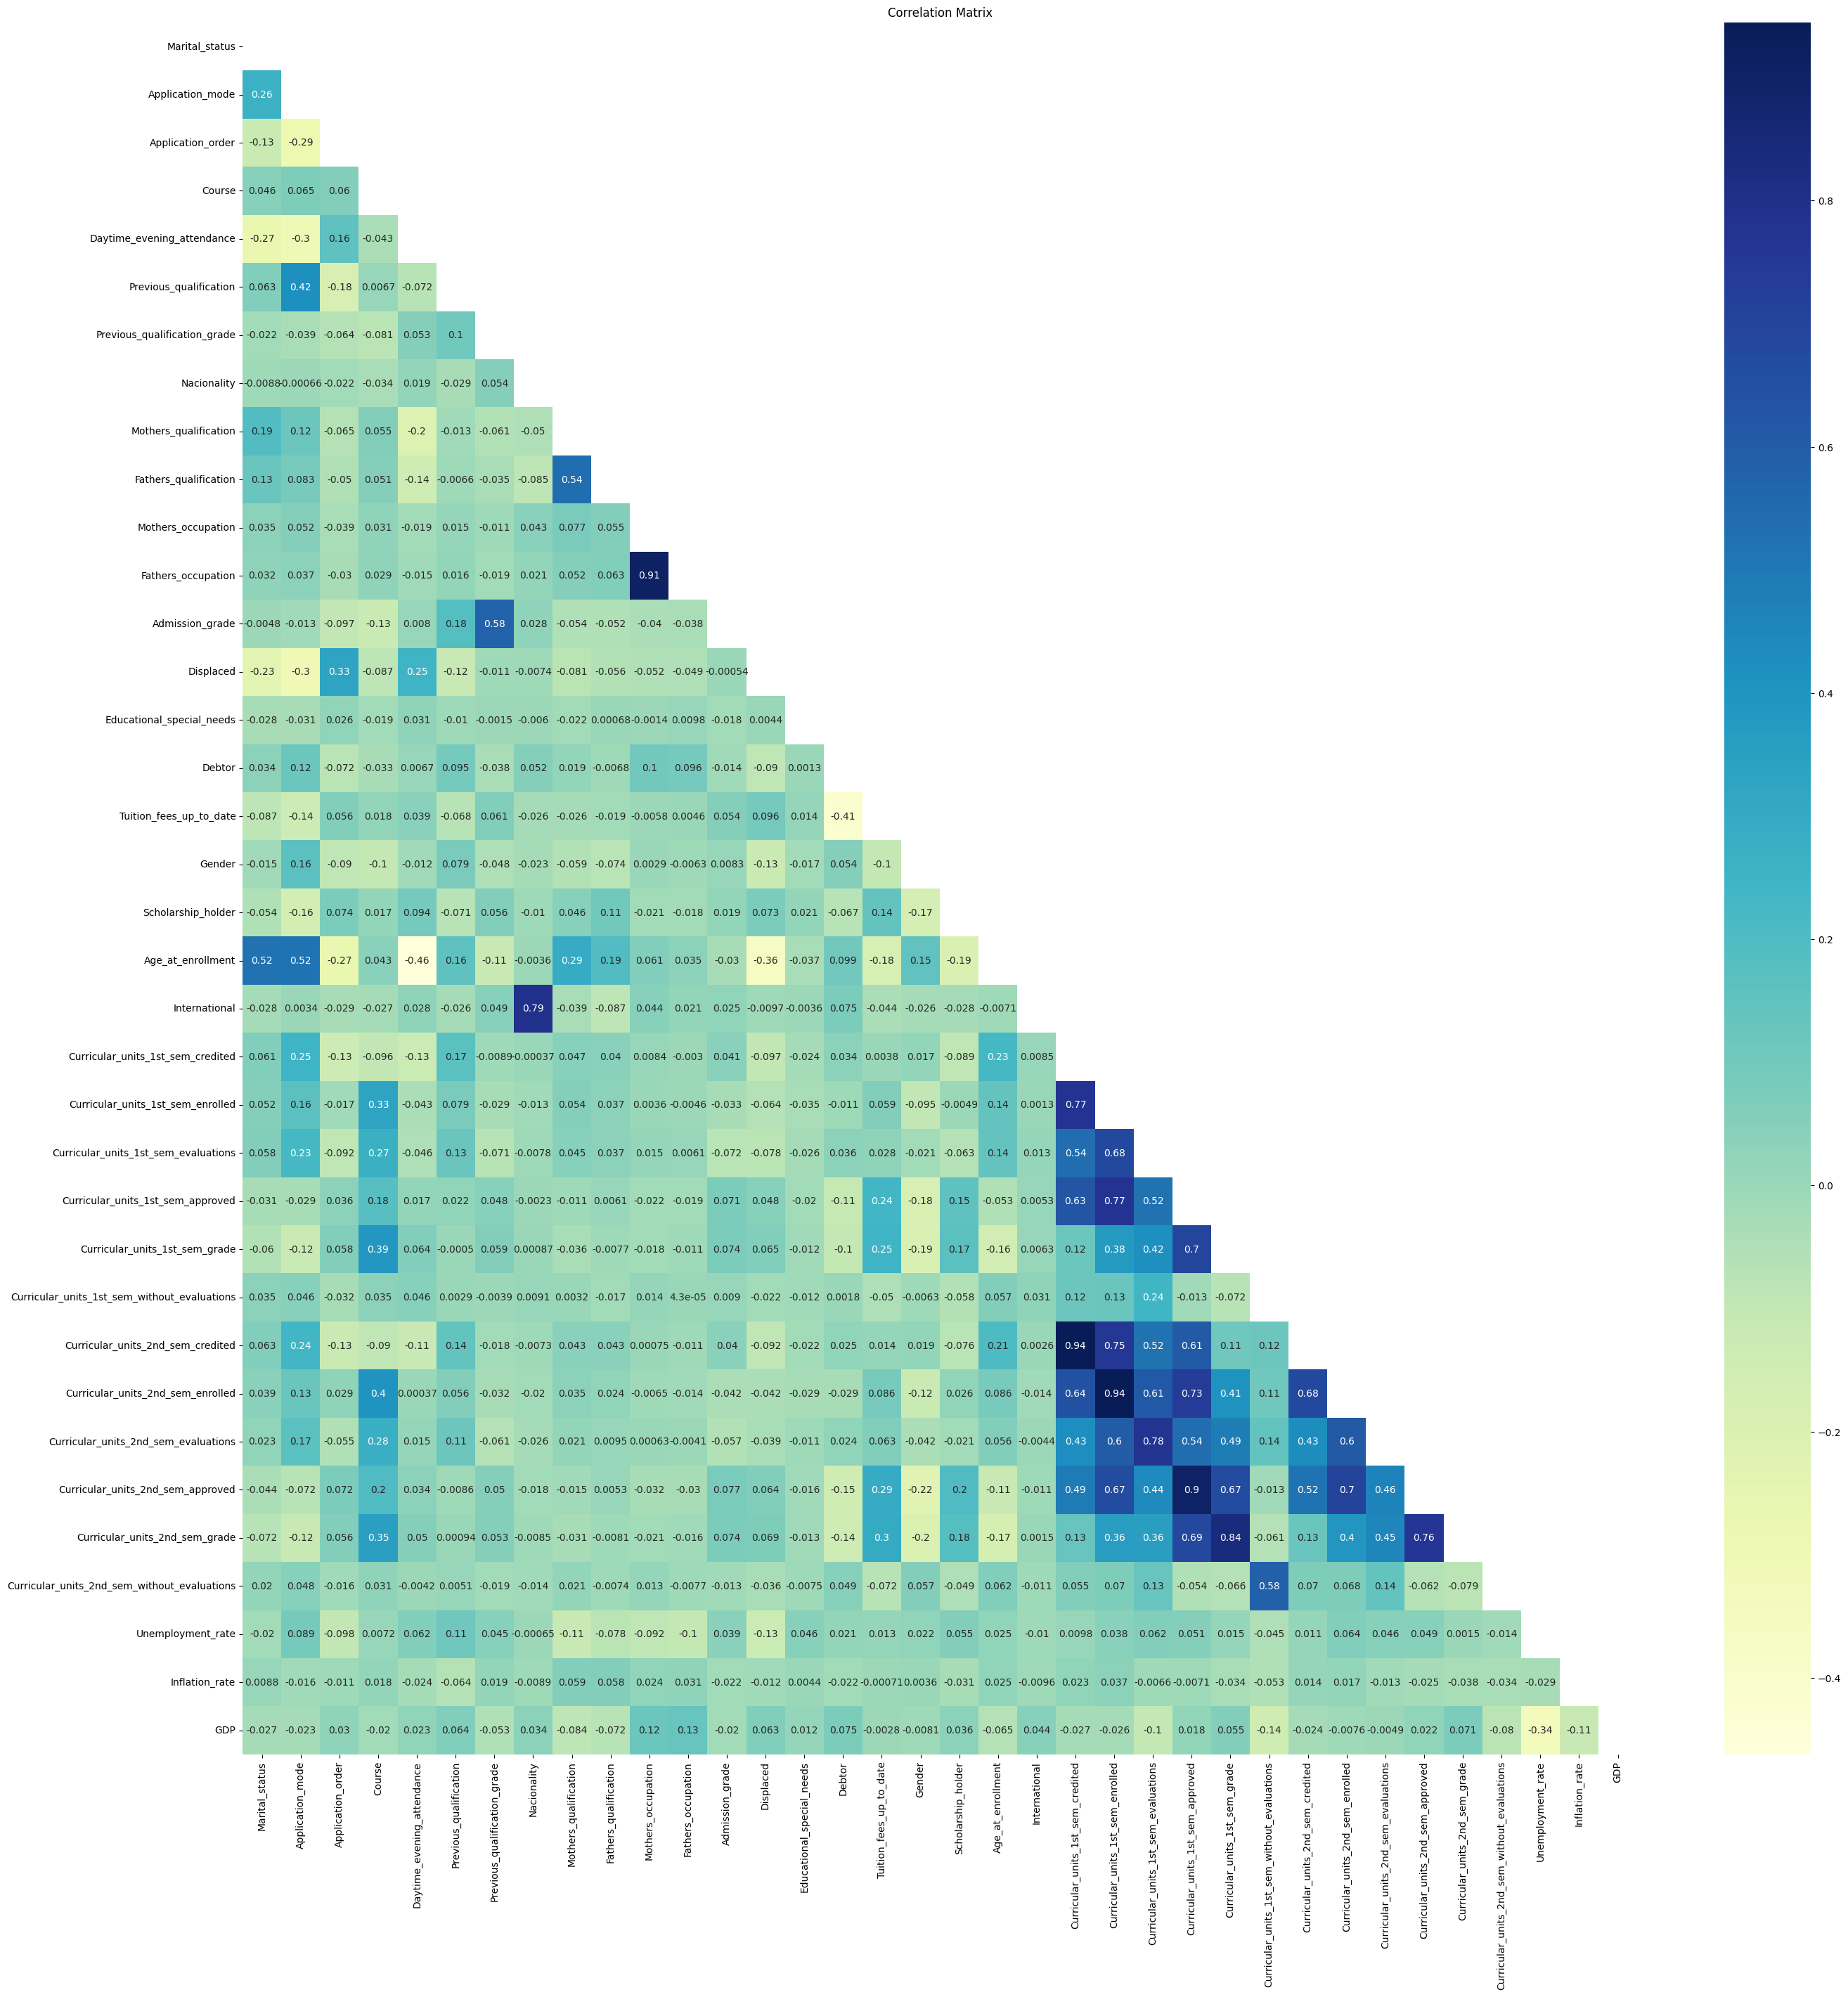

In [13]:
correlation_matrix = data.drop('Status', axis=1).corr()

plt.figure(figsize = (32,32))
ax = sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True, mask=np.triu(correlation_matrix))
plt.title('Correlation Matrix')
plt.show()

## Data Preparation / Preprocessing

In [14]:
data.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [15]:
data.duplicated().sum()

np.int64(0)

In [16]:
data[data['Status'] == 'Dropout'].value_counts().sum()

np.int64(1421)

In [17]:
data[data['Status'] == 'Graduate'].value_counts().sum()

np.int64(2209)

In [18]:
data[data['Status'] == 'Enrolled'].value_counts().sum()

np.int64(794)

In [19]:
status_label_to_numeric = {
    'Dropout': 0,
    'Graduate': 1,
    'Enrolled': 3
}

data['StatusEncoded'] = data['Status'].map(status_label_to_numeric)

In [20]:
data['StatusEncoded'].head(5)

0    0
1    1
2    0
3    1
4    1
Name: StatusEncoded, dtype: int64

In [21]:
scaler = MinMaxScaler()
# Fit and transform the data
normalized_data = scaler.fit_transform(data.drop(['Status', 'StatusEncoded'], axis=1))

In [22]:
X = normalized_data
y = data['StatusEncoded']

# Split the Dataset into Train and Test with test 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Modeling

In [30]:
# Try every classifiers because why not? :)
model_classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=99),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(random_state=99),
    'Decision Tree': DecisionTreeClassifier(random_state=44),
    'Random Forest': RandomForestClassifier(n_estimators=120, random_state=88),
    'Gradient Boosting': GradientBoostingClassifier(random_state=99),
    'Naive Bayes': MultinomialNB(),
    'Multi-Layer Perceptron': MLPClassifier(max_iter=1000, random_state=99),
    'AdaBoost': AdaBoostClassifier(random_state=99),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Extra Trees': ExtraTreesClassifier(random_state=99),
    'Stochastic Gradient Descent': SGDClassifier(random_state=99),
    'Bagging Classifier': BaggingClassifier(random_state=99)
}

In [31]:
model_evaluations = {}

for model_name, model in model_classifiers.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    model_evaluations[model_name] = {
        'accuracy': accuracy_score(y_test, predictions),
        'confusion_matrix': confusion_matrix(y_test, predictions)
    }
    print(f'{model_name} Has finished training and evaluated!')

Logistic Regression Has finished training and evaluated!
K-Nearest Neighbors Has finished training and evaluated!
Support Vector Machine Has finished training and evaluated!
Decision Tree Has finished training and evaluated!
Random Forest Has finished training and evaluated!
Gradient Boosting Has finished training and evaluated!
Naive Bayes Has finished training and evaluated!
Multi-Layer Perceptron Has finished training and evaluated!
AdaBoost Has finished training and evaluated!
Linear Discriminant Analysis Has finished training and evaluated!
Quadratic Discriminant Analysis Has finished training and evaluated!
Extra Trees Has finished training and evaluated!
Stochastic Gradient Descent Has finished training and evaluated!
Bagging Classifier Has finished training and evaluated!


## Evaluation

In [32]:
model_evaluations_values = model_evaluations.values()
accuracy_df = pd.DataFrame({
    'Model': list(model_evaluations.keys()),
    'Accuracy': [metrics['accuracy'] for metrics in model_evaluations_values]
}).sort_values('Accuracy', ascending=True)

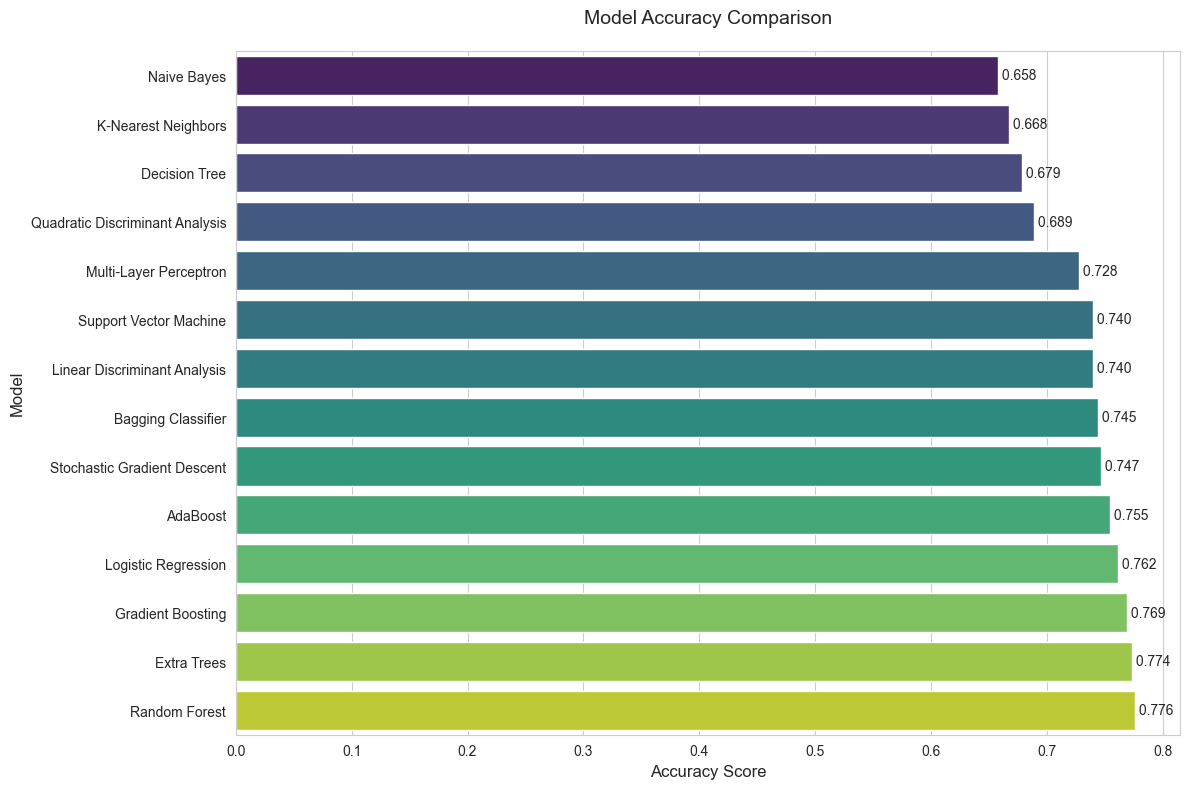

In [33]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.barplot(data=accuracy_df, y='Model', x='Accuracy', palette='viridis')

plt.title('Model Accuracy Comparison', pad=20, fontsize=14)
plt.xlabel('Accuracy Score', fontsize=12)
plt.ylabel('Model', fontsize=12)

for i, v in enumerate(accuracy_df['Accuracy']):
    plt.text(v, i, f' {v:.3f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [38]:
def PrintModelEvaluation(model, matrix):

    matrix = evaluation['confusion_matrix']
    accuracy = evaluation['accuracy']

    print('-'*20, model, '-'*20)
    print(f'Accuracy: {accuracy}')
    print(f'True Positive: {matrix[0][0]} False Positive: {matrix[0][1]}')
    print(f'False Negative: {matrix[1][0]} True Negative: {matrix[1][1]}')
    print('-' * (40 + len(model) + 2))


for model_name, evaluation in model_evaluations.items():
    PrintModelEvaluation(model_name, evaluation)

-------------------- Logistic Regression --------------------
Accuracy: 0.7615819209039548
True Positive: 211 False Positive: 47
False Negative: 8 True Negative: 414
-------------------------------------------------------------
-------------------- K-Nearest Neighbors --------------------
Accuracy: 0.6677966101694915
True Positive: 186 False Positive: 74
False Negative: 44 True Negative: 375
-------------------------------------------------------------
-------------------- Support Vector Machine --------------------
Accuracy: 0.7401129943502824
True Positive: 187 False Positive: 58
False Negative: 4 True Negative: 429
----------------------------------------------------------------
-------------------- Decision Tree --------------------
Accuracy: 0.6790960451977401
True Positive: 197 False Positive: 38
False Negative: 33 True Negative: 346
-------------------------------------------------------
-------------------- Random Forest --------------------
Accuracy: 0.7762711864406779
True Po

## Save the best model

In [35]:
best_model = accuracy_df.sort_values('Accuracy', ascending=False).values[0]
best_model_name = best_model[0]
best_model_accuracy = best_model[1]
print(f'Best model: {best_model_name} with Accuracy: {best_model_accuracy}')

Best model: Random Forest with Accuracy: 0.7762711864406779


In [37]:
joblib.dump(model_classifiers[best_model_name], './model/model.joblib')
print(f'Best model: {best_model_name} has been saved to disk on path "./model/model.joblib"')

Best model: Random Forest has been saved to disk on path "./model/model.joblib"


## Save the scaler

In [39]:
joblib.dump(scaler, './model/scaler.joblib')
print(f'Scaler has been saved to disk on path "./model/scaler.joblib"')

Scaler has been saved to disk on path "./model/scaler.joblib"
